# Financial Analysis
<p class="lead"> Financial analysis of Google, Salesforce and Oracle stock to check anomalies, most traded stock, volume and other financial indicators. Data taken from Yahoo Finance.</p>

In [5]:
## importing libraries
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix

import yfinance as yfin
yfin.pdr_override()

In [6]:
# define start and end dates
start = datetime.datetime(2017,1,1)
end  = datetime.datetime(2022,1,1)

In [9]:
# get the data from yahoo
google= yfin.download('GOOGL',start,end)
salesforce = yfin.download('CRM',start,end)
oracle = yfin.download('ORCL',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


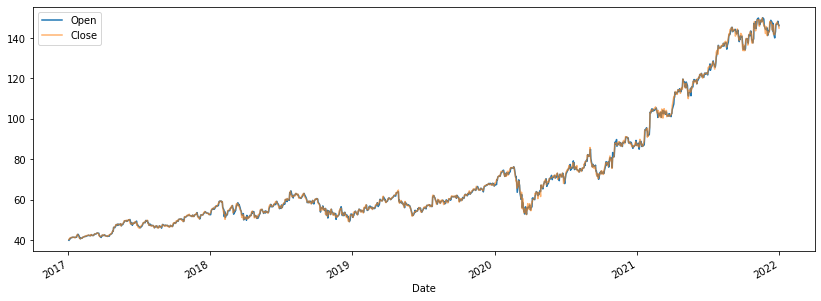

In [10]:
# compare open and close to see anomalies
google['Open'].plot(label = 'Open', figsize = (14,5))
google['Close'].plot(label = 'Close', alpha = .6 )
plt.legend()

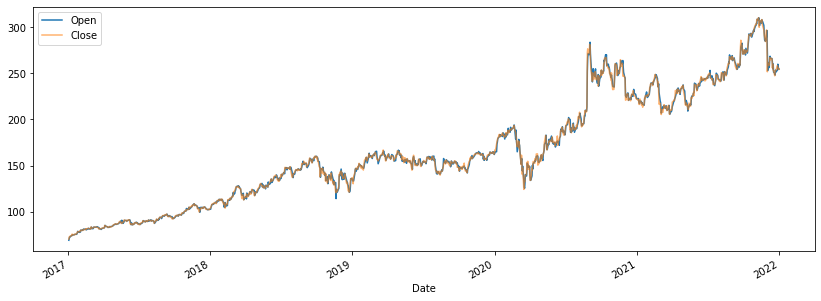

In [11]:
salesforce['Open'].plot(label = 'Open', figsize = (14,5))
salesforce['Close'].plot(label = 'Close', alpha = .6 )
plt.legend()

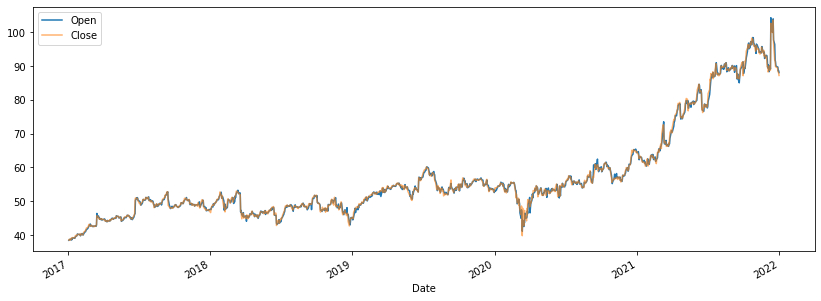

In [12]:
oracle['Open'].plot(label = 'Open', figsize = (14,5))
oracle['Close'].plot(label = 'Close', alpha = .6 )
plt.legend()

# Analysis of the volume to see the most traded stock 


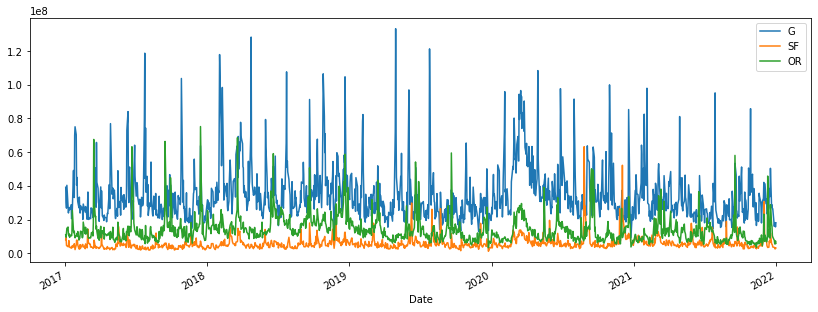

In [13]:
google['Volume'].plot(label = 'G',figsize = (14,5))
salesforce['Volume'].plot(label = 'SF')
oracle['Volume'].plot(label = 'OR')
plt.legend()

# Daily returns

In [14]:
google['Return'] = google['Close']/(google['Close'].shift(1))
salesforce['Return'] = salesforce['Close']/(salesforce['Close'].shift(1))
oracle['Return'] = oracle['Close']/(oracle['Close'].shift(1))

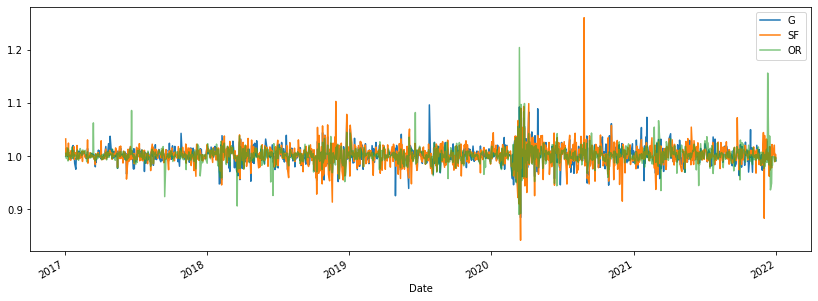

In [15]:
google['Return'].plot(label = 'G',figsize = (14,5))
salesforce['Return'].plot(label = 'SF')
oracle['Return'].plot(label = 'OR', alpha = .6)
plt.legend()

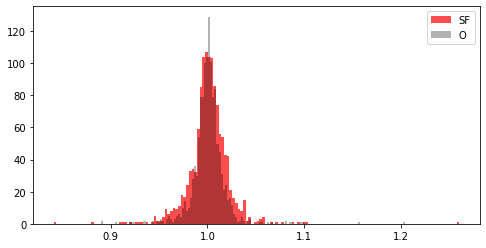

In [21]:
# SF and Oracle seem the ones with the most spikes in the returns, so let's plot their volatility
fig, ax = plt.subplots()
salesforce['Return'].hist(figsize = (8,4),label = 'SF', bins=150, alpha=0.7, color='red')
oracle['Return'].hist(label = 'O', bins=150, alpha=0.3, color='black')
ax.grid(False)
plt.legend()

##### From the graph it seems SF has the highest volatility

In [22]:
sf_volatility = salesforce['Return'].std()*252**.5
g_volatility = google['Return'].std()*252**.5
o_volatility = oracle['Return'].std()*252**.5


In [27]:
o_volatility

0.27764239896105425

In [28]:
sf_volatility

0.3363809619017329

# Calculate Salesforce Moving Average and Exponential Moving Average (weighting to recent prices)

In [92]:
salesforce['MA50'] = salesforce['Close'].rolling(50).mean()
salesforce['EMA50'] = salesforce['Close'].ewm(span=50, adjust=False).mean()

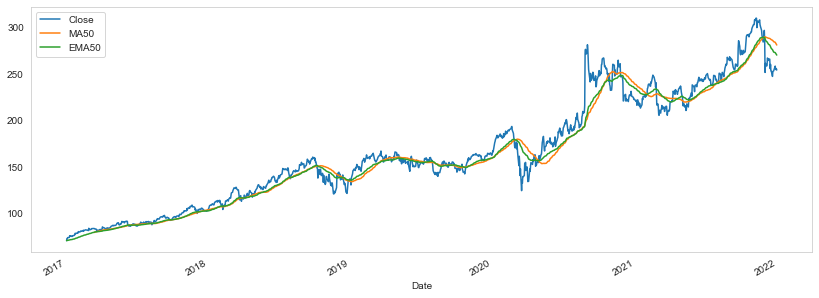

In [95]:
salesforce['Close'].plot(figsize = (14,5))
salesforce['MA50'].plot(label = 'MA50')
salesforce['EMA50'].plot(label = 'EMA50')
plt.legend()

# MACD to see when to buy/sell
12-Period EMA − 26-Period EMA -9-Period Signal Line

In [97]:
ema12 = salesforce['Close'].ewm(span=12, adjust=False).mean()
ema26 = salesforce['Close'].ewm(span=26, adjust=False).mean()
salesforce['MACD'] = ema12-ema26
salesforce['Signal line'] = salesforce['MACD'].ewm(span=9, adjust=False).mean()

<AxesSubplot:>

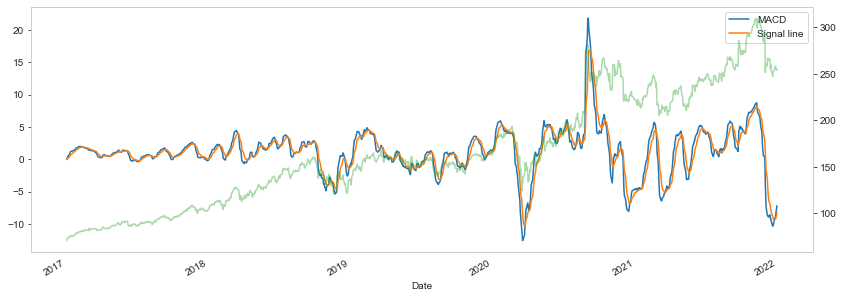

In [101]:
fig, ax = plt.subplots()
salesforce[['MACD', 'Signal line']].plot(ax=ax, figsize = (14,5))
salesforce['Close'].plot(ax=ax, alpha=0.4, secondary_y=True)

# Are the prices correlated?

array([[<AxesSubplot:xlabel='Google Open', ylabel='Google Open'>,
        <AxesSubplot:xlabel='SF Open', ylabel='Google Open'>,
        <AxesSubplot:xlabel='Oracle Open', ylabel='Google Open'>],
       [<AxesSubplot:xlabel='Google Open', ylabel='SF Open'>,
        <AxesSubplot:xlabel='SF Open', ylabel='SF Open'>,
        <AxesSubplot:xlabel='Oracle Open', ylabel='SF Open'>],
       [<AxesSubplot:xlabel='Google Open', ylabel='Oracle Open'>,
        <AxesSubplot:xlabel='SF Open', ylabel='Oracle Open'>,
        <AxesSubplot:xlabel='Oracle Open', ylabel='Oracle Open'>]],
      dtype=object)

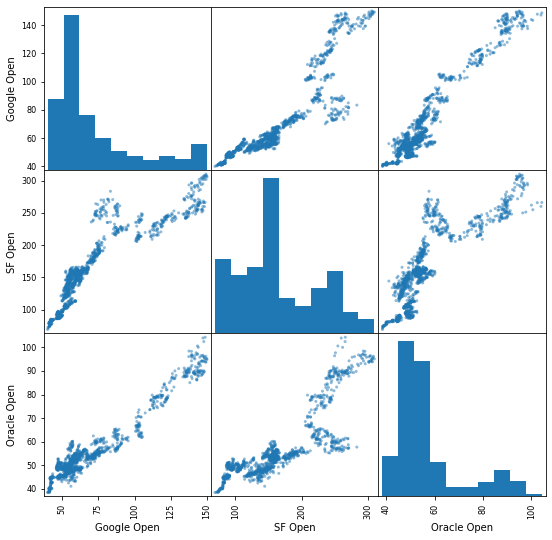

In [29]:
prices = pd.concat([google['Open'],salesforce['Open'],oracle['Open']],axis=1)
prices.columns =['Google Open','SF Open','Oracle Open']
scatter_matrix(prices,figsize=(9,9))

# It appears that Google and Oracle prices are correlated